<a href="https://colab.research.google.com/github/tjwei/taishin20190827/blob/master/classifier_on_sr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross validation

台新分析開發環境案客戶資料
https://drive.google.com/drive/u/2/folders/1AAXWPcB9xiDe_qX87ce5XL-utkASWxRe

請先連到這個分享資料夾，並且按下右鍵，加入你的 Google 雲端硬碟


In [1]:
# 這個是授權存取你的 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 確認真的連上了資料
!ls drive/My\ Drive/台新分析開發環境案客戶資料

'Copy of 0606_口述台新資料欄位.m4a'
'Copy of 0610_嘉駿寄來的欄位內容.png'
'Copy of 0621_data_original.zip'
'Copy of profile.csv'
'Copy of profile.gsheet'
'Copy of result_y1.csv'
'Copy of result_y1.gsheet'
'Copy of result_y2.csv'
'Copy of sr_1.csv'
'Copy of sr_2.csv'
'Copy of sr_3.csv'
'Copy of sr_4.csv'
'Copy of status.csv'
'Copy of visa-merchant-data-standards-manual_用來對照sr_1.csv中的mcc欄位.pdf'
'Copy of zip 對照表.xlsx'
'Copy of 檔案欄位說明_MOOCS.XLSX'


In [0]:
# 正式開始
import pandas as pd
import os.path
import numpy as np

In [0]:
DATA_DIR='drive/My Drive/台新分析開發環境案客戶資料'
sr1_fn = os.path.join(DATA_DIR, 'Copy of sr_1.csv')
with open(sr1_fn, encoding='cp950', errors='replace') as sr1_f:
  sr1_df = pd.read_csv(sr1_f)
profile_fn = os.path.join(DATA_DIR, 'Copy of profile.csv')
profile_df = pd.read_csv(profile_fn)
profile_df.set_index('CUST_NO', inplace=True)

In [3]:
sr1_df.head()

CUST_NO    EFF_DT   STMT_DT   amt                         TXN_DESC   mcc
0   564755  20180615  20180702   174    全聯台中四平分公司           TAICHU/TW  5411
1   564755  20180624  20180702   484    全聯台中四平分公司           TAICHU/TW  5411
2  6185152  20180620  20180702  1035  健身工廠九如廠               Kaohsi/TW  7997
3  6185152  20180623  20180702  1304    富邦ｍｏｍｏ－ＥＣ           TAIPEI/TW  5311
4  5318034  20170629  20180702  5899    國泰人壽保費部         第 12/12 期 /TW  6300

In [4]:
df = sr1_df[['CUST_NO', 'mcc', 'amt']].groupby(['CUST_NO', 'mcc']).sum().unstack().fillna(0)
df.head()

amt                           ...                                     
mcc         0    742  763  780  1520 1711  ... 9211 9222    9311     9399 9402 9405
CUST_NO                                    ...                                     
21969        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0  70786.0  0.0  0.0
24081    14148.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  9695.0      0.0  0.0  0.0
37917        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0
38277        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0
38312        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0     0.0      0.0  0.0  0.0

[5 rows x 472 columns]

In [7]:
# ratio of the spends
df[df<0]=0
df = df[df.sum(axis=1)>0]
df = df.div(df.sum(axis=1), axis=0)
df.head()

amt                      ...                                   
mcc          0    742  763  780  1520  ... 9222      9311      9399 9402 9405
CUST_NO                                ...                                   
21969    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.862213  0.0  0.0
24081    0.072292  0.0  0.0  0.0  0.0  ...  0.0  0.049538  0.000000  0.0  0.0
37917    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0
38277    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0
38312    0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.000000  0.000000  0.0  0.0

[5 rows x 472 columns]

In [8]:
df.sum(axis=0).sort_values().tail()

     mcc 
amt  4784     7548.565596
     4722     9224.629785
     6300    27176.126703
     5411    27180.307511
     5311    33845.416573
dtype: float64

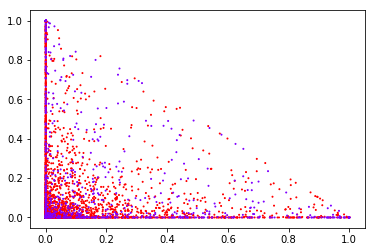

In [9]:
import matplotlib.pyplot as plt
y = profile_df.c_gender[df.index] == 'M'
X = df.values.astype('float')
# 標出 sample 點
plt.scatter(df['amt', 5311][:5000], df['amt', 5411][:5000],  c=y[:5000], cmap=plt.cm.rainbow, zorder=10, s=1);


In [48]:
X.shape

(236689, 472)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.95, random_state=42)

In [50]:
X_train.shape

(11834, 472)

In [51]:
X_test.shape

(224855, 472)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(np.array(X_train), y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7033969917187765
0.6912276800604834


In [54]:
m, s = X_train.mean(), X_train.std()
model.fit(np.array( (X_train-m)/s ), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print(model.score((X_train-m)/s, y_train))
print(model.score((X_test-m)/s, y_test))

0.7127767449721143
0.6942385092615241


In [56]:
from sklearn.svm import SVC
model = SVC()
model.fit(np.array(X_train), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
model.score(X_train, y_train)

0.6399357782660132

In [58]:
model.score(X_test[:10000], y_test[:10000])

0.6286

In [0]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128, 32), activation='relu')
m, s = X_train.mean(), X_train.std()
model.fit(np.array( (X_train-m)/s ), np.int64(y_train) )
print(model.score((X_train-m)/s, np.int64(y_train)))
print(model.score((X_test-m)/s, np.int64(y_test)))

In [63]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128, 32), activation='relu')
model.fit(X_train, y_train )
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.7741161360102752
0.718230596983396


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df, y, test_size=0.5, random_state=42)

In [11]:
X_train.shape

(118344, 472)

In [0]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
                    Dense(128, input_shape=(472,), use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    Dense(32, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),                   

                    Dense(1, activation='sigmoid'),
])



In [0]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
                    Dense(128, input_shape=(472,), use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    Dense(256, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    Dropout(0.5),
                    Dense(128, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),                   

                    Dense(1, activation='sigmoid'),
])



In [0]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=[X_test, y_test])

In [13]:
sr1_df[sr1_df.CUST_NO == 564755].sort_values('EFF_DT')[['mcc', 'amt']].values

array([[5411,  174],
       [5411,  484],
       [5542,  612],
       [5411,  503],
       [5411,  223],
       [5411,  240],
       [5311,  115],
       [5542,  680],
       [5542,  620],
       [5411,  280],
       [5411,  226],
       [5411,  367],
       [5411,  122],
       [5311,  208],
       [5542,  475],
       [5311,  576],
       [5311,  475],
       [5411,  409],
       [5542,  232],
       [5542,  210]])

In [16]:
# To sequence
sr1_df[:10000].groupby('CUST_NO').apply(lambda x:x.sort_values('EFF_DT')[['mcc', 'amt']].values)

CUST_NO
42434                                          [[4722, 3142]]
46438                    [[5311, 144], [0, 524], [5541, 109]]
47150                            [[7992, 2252], [7992, 2388]]
49403                             [[5311, 2601], [5411, 586]]
59378                   [[5542, 55], [5542, 55], [5542, 114]]
67259                             [[6300, 1240], [6300, 683]]
68407                                          [[5722, 3753]]
83669                            [[5541, 1585], [5541, 1404]]
89758       [[4112, 430], [5811, 252], [5411, 476], [5411,...
99208       [[5541, 1382], [4812, 838], [5411, 440], [5411...
99404       [[5542, 752], [5542, 1028], [5542, 1147], [481...
102934                                         [[6300, 7867]]
110011                                          [[4814, 613]]
113036      [[5411, 211], [5411, 184], [5411, 184], [5411,...
119863      [[5964, 520], [9311, 1385], [5542, 66], [4816,...
121674      [[4112, 1561], [5814, 524], [4900, 21], [5812,...
